# Semantic Spotter (insurance Domain)

##Import and install useful packages

In [2]:
# install required packages
!pip install -q openai langchain chromadb faiss-cpu docarray langchain-community


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.2/270.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 127.5 MB/s eta 0:

In [3]:
# Installing tiktoken library for working with OpenAI's embedding model
!pip install tiktoken

In [14]:
# install the ChatOpenAI model
!pip install -qU langchain-openai

##OpenAI Key

In [10]:
# import the necessary libraies
import os
import openai

folder_path = './'
os.chdir(folder_path)

# Read the text file containing the API key
with open(folder_path + "API_KEY_JS.txt", "r") as f:
  openai.api_key = ' '.join(f.readlines())

# Update the OpenAI API key by updating the environment variable
os.environ["OPENAI_API_KEY"] = openai.api_key

In [60]:
# import required libraries
from langchain_openai import ChatOpenAI, OpenAI

# instantiate OpenAI's Chat Model
llm_chat = ChatOpenAI()

## **Understanding LangChain's Core Components**

LangChain is a powerful framework designed to enhance the capabilities of language models (LLMs) by providing structured components for interacting with models, managing data, and building intelligent applications. It revolves around six key building blocks:

**1. Model I/O**
This component handles interactions with language models, including generating responses. It consists of:

* *Language Models* (LLMs & Chat Models): Provides a standardized way to interact with various LLM providers such as OpenAI, Cohere, and Hugging Face.
*   *Prompts:* Helps in structuring, selecting, and managing inputs given to models.
*   *Output Parsers*: Extracts structured information from the model’s response.

**2. Retrieval**
Retrieval enables applications to fetch relevant data from external sources such as databases and documents. It includes:

Document Loaders & Transformers: Process and structure data for the LLM.
Text Embedding Models & Vector Stores: Store and retrieve semantically similar information.
Retrievers: Efficiently fetch the most relevant information for a query.

**3. Chains**
Chains allow developers to create sequences of LLM calls, linking multiple steps together to build complex workflows.

**4. Memory**
This feature allows applications to maintain context between interactions, enabling a more natural and stateful conversation experience.

**5. Agents**
Agents enable dynamic decision-making by allowing the system to determine which tools or actions to use based on high-level directives.

**6. Callbacks**
Callbacks provide real-time logging and streaming of intermediate steps within a chain, helping with debugging and monitoring.



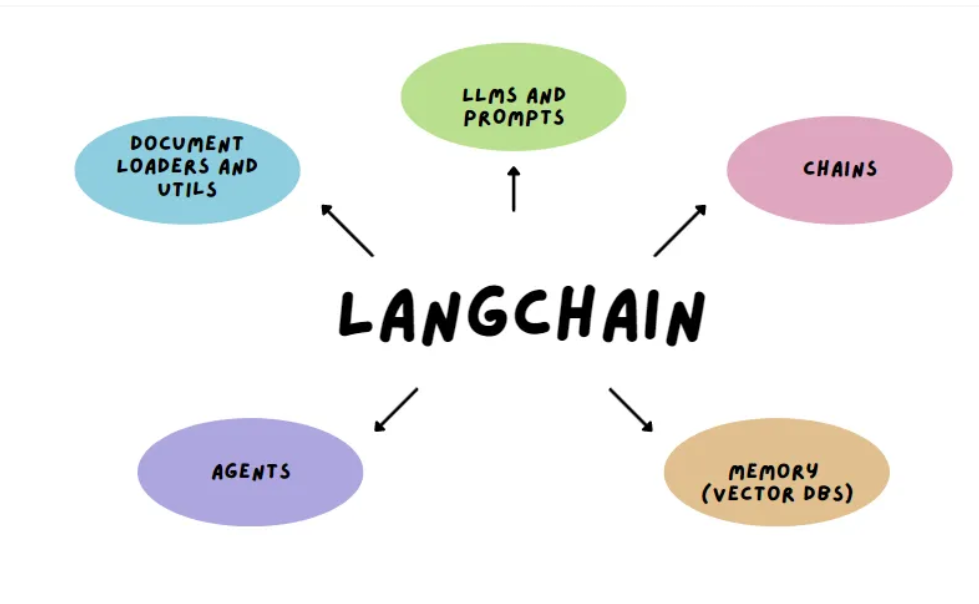

####**1.Model I/O: Working with Language Models in LangChain**


LangChain offers built-in support for working with LLMs, making it easy to integrate with various providers. There are two main types of models:

1. **LLMs (Legacy Support)**
LLMs operate on a simple "text in, text out" approach, where they take a string as input and return a generated string as output. However, OpenAI has categorized traditional text completion models as legacy, and LangChain no longer supports them as a standard interface.

2. **Chat Models (Preferred Approach)**
Chat models, such as OpenAI’s ChatGPT, are a specialized type of LLM optimized for turn-based conversations. Instead of handling plain text input, they accept structured chat messages with specific roles like:

System Messages (providing general instructions)
User Messages (input from the user)
Assistant Messages (responses from the AI)
Using OpenAI's Chat Model in LangChain
To work with OpenAI’s chat model in LangChain, follow these steps:

1. Install the Required Library
Run the following command to install the OpenAI integration for LangChain:

```
pip install -qU langchain-openai
```

2. Import and Initialize the Chat Model
You can initialize the OpenAI chat model in two ways:

Option 1: Pass API Key Directly

```
from langchain_openai import ChatOpenAI
chat = ChatOpenAI(openai_api_key="your-api-key")
```


Option 2: Use Environment Variables

`from langchain_openai import ChatOpenAI`

`chat = ChatOpenAI()`


The ChatOpenAI() class accepts multiple parameters that allow customization of the chat model's behavior. While the full list is available in the API reference, some key parameters include:

**max_tokens**: Sets the maximum number of tokens the model can generate.

**model_nam**e:Defines the specific model to use (default: gpt-3.5-turbo).

**max_retries**:Specifies how many times to retry in case of a failure (default: 6).

**temperature**: Controls randomness in responses (default: 0.7); lower values make responses more deterministic, while higher values introduce more variability.


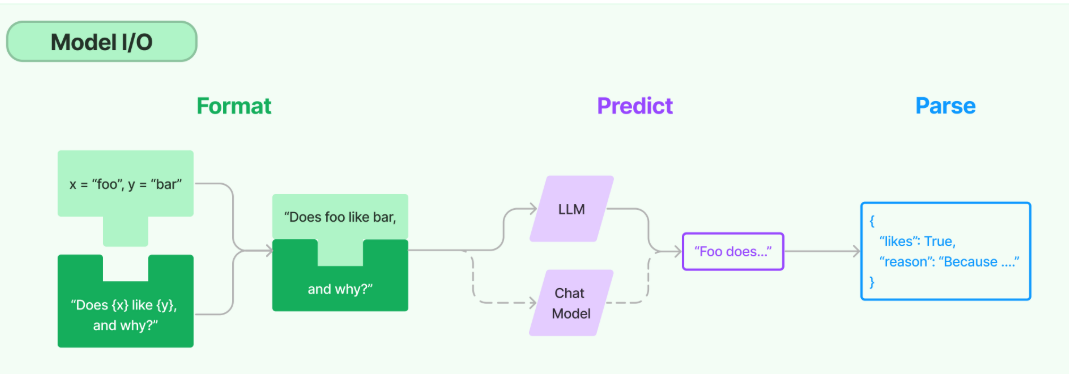

####**2. Data Connections and Retrieval**


LangChain not only simplifies API calls but also offers powerful tools for efficiently working with external documents. Many LLM applications require access to user-specific data that is not part of the model's training set. The most effective approach for this is Retrieval Augmented Generation (RAG) a technique where external data is retrieved and provided to the LLM during the generation process.

LangChain provides a complete set of building blocks for RAG applications, ranging from simple retrieval methods to complex pipelines. The retrieval process, though seemingly straightforward, involves multiple key components that ensure efficient data fetching and processing.

Key Modules for Document Processing in LangChain:


*   Document Loaders:Import and structure data from various sources and formats.
*   Text Splitters: Break down large documents into manageable chunks.

* Vector Stores: Store document embeddings for efficient similarity searches.
* Retrievers :Fetch relevant information based on queries.

**Document Loaders**

Document Loaders allow seamless integration with various data sources and formats, converting them into structured Documents that contain both text content and relevant metadata.

LangChain supports document loading from sources like:

✔ File formats: PDFs, HTML, text files, etc.

✔ Locations: Cloud storage, public websites, databases, and more.

✔ Integrations: Over 100 different loaders, including connections with AirByte and Unstructured.io.

Some document loaders may require additional libraries for proper functionality.

**Loading PDF Documents:**

LangChain can load and parse PDF files using specialized PDF connectors. One such example is PyPDFLoader, which loads PDFs into an array of documents. Each document includes:

Page content:The extracted text.
Metadata:Such as the page number for reference.

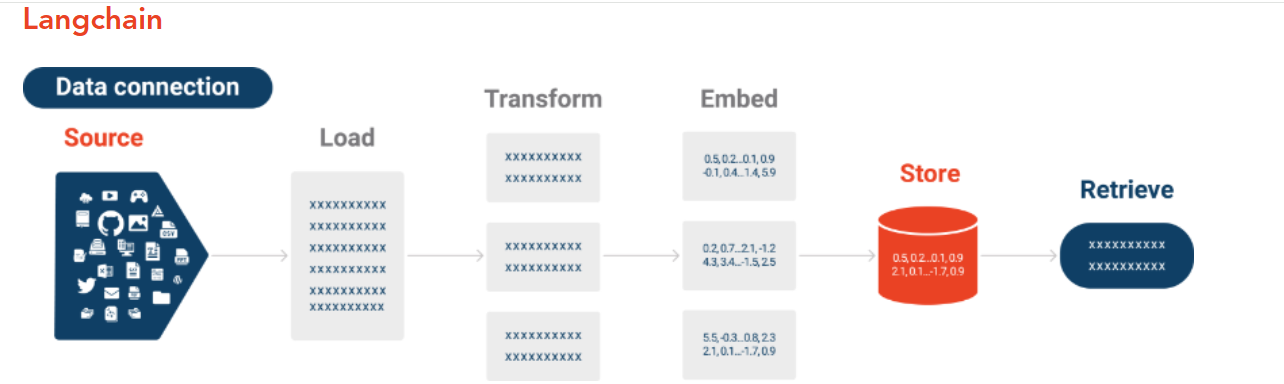

##Read and Process Insurance policy pdf file

In [66]:
# import the PyPDFLoader class from LangChain
from langchain_community.document_loaders import PyPDFDirectoryLoader

# Read the insurance documents from directory
pdf_directory_loader = PyPDFDirectoryLoader(folder_path + '/Policies Documents')
documents = pdf_directory_loader.load()

In [68]:
# print details and first 100 lines from each docucment
for doc in documents:
    print(f"Source: {doc.metadata['source']}")
    print(f"Page Number: {doc.metadata['page']}")
    print(f"Content: {doc.page_content[:100]}...")  # Displaying the first 100 characters

Source: Policies Documents/DAMAN_ONBOARDING-BROCHURE_EN.pdf
Page Number: 0
Content: Member
onboarding kit
WELCOME
TO THE FAMILY
1PB...
Source: Policies Documents/DAMAN_ONBOARDING-BROCHURE_EN.pdf
Page Number: 1
Content: Insurance
Made Simple
Welcome to Daman 3
Online Registration via Mobile App 8
Online Registration vi...
Source: Policies Documents/DAMAN_ONBOARDING-BROCHURE_EN.pdf
Page Number: 2
Content: Welcome
to Daman
We are delighted to welcome you to our Daman family. We have been
striving to make ...
Source: Policies Documents/DAMAN_ONBOARDING-BROCHURE_EN.pdf
Page Number: 3
Content: Ahmed
Hello there! I’m your go-to guy for all things related 
to Registration and will help you set ...
Source: Policies Documents/DAMAN_ONBOARDING-BROCHURE_EN.pdf
Page Number: 4
Content: Meet the
Team
Angelo
Hey there! Want to know 
how to best use Daman’s 
Services for Medical 
Treatme...
Source: Policies Documents/DAMAN_ONBOARDING-BROCHURE_EN.pdf
Page Number: 5
Content: Online
Registration
We know t

### **Document Transformers / Text Splitters**
When working with long documents, such as books or large reports, LLMs have size limitations, requiring you to split the content into smaller chunks. Text splitters help divide documents into manageable pieces for processing.

LangChain provides multiple text splitting techniques, allowing flexibility based on document structure and use case. You can experiment with different methods to determine the most effective approach.

Types of Text Splitters in LangChain
* Split by Character
 *Recursive Splitter
* Token Splitter

**1. Split by Character**
* Description: The simplest way to split text—based on specific characters (default: "\n\n").
* Chunk Size Measurement: Character count.

Example Usage:
Splits text based on specific characters like newlines (\n) or spaces.
Fast and efficient, but may break meaningful sentences if not configured properly.

**2. Recursive Text Splitter (Recommended)**
* Description: A more intelligent method that splits text hierarchically using a predefined list of characters.
* Chunk Size Measurement: Character count.

How It Works:

It attempts to split at paragraphs (\n\n), then sentences (\n), then words ( ) while keeping related text together.
This ensures semantic coherence, making it the best choice for general-purpose text processing.
Advantages:

* Retains context better than simple character splitting.
* Ensures that semantically related text remains in the same chunk.

**3. Split by Tokens**
* Description: Instead of characters, this method counts tokens to split text effectively within LLM limits.
* Chunk Size Measurement: Token count.

Why Use Token Splitting?

Language models have token limits (e.g., GPT-4 may have a 4096-token limit).
Ensuring chunks stay within the token limit prevents truncation errors.
Uses the same tokenizer as the target language model for consistency.
Best For:

* When exact token counts are crucial for processing.
* Ensuring compliance with model-specific constraints.

In [69]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Initialize the RecursiveCharacterTextSplitter (customize chunk size and overlap as needed)
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)

splits = text_splitter.split_documents(documents)

In [70]:

# print a sample chunk
print(splits[2])

page_content='Welcome
to Daman
We are delighted to welcome you to our Daman family. We have been
striving to make the UAE a healthier, happier community and we’re eager
to make a difference in your life.
Daman is the market leader in health insurance in the UAE and is 
headquartered in Abu Dhabi, with branches and service points in different 
areas of the UAE. Daman gained the trust of 2.8 million members, building 
the largest customer base in the country since 2006.
As your health insurance specialists, we are here to make sure that you have 
access to the best of medical services, whenever you need it.
32' metadata={'producer': 'Adobe PDF Library 17.0', 'creator': 'Adobe InDesign 19.0 (Macintosh)', 'creationdate': '2023-11-17T10:46:53+02:00', 'moddate': '2023-11-24T10:42:46+04:00', 'trapped': '/False', 'source': 'Policies Documents/DAMAN_ONBOARDING-BROCHURE_EN.pdf', 'total_pages': 32, 'page': 2, 'page_label': '3'}


In [71]:
print ("Text Preview:") # Preview the split texts and the character count
print (splits[0].page_content,"-", len(splits[0].page_content), "\n")
print (splits[1].page_content,"-", len(splits[1].page_content), "\n")
print (splits[2].page_content,"-", len(splits[2].page_content), "\n")
print (splits[3].page_content,"-", len(splits[3].page_content), "\n")
print (splits[4].page_content,"-", len(splits[4].page_content), "\n")
print (splits[5].page_content,"-", len(splits[5].page_content), "\n")

Text Preview:
Member
onboarding kit
WELCOME
TO THE FAMILY
1PB - 47 

Insurance
Made Simple
Welcome to Daman 3
Online Registration via Mobile App 8
Online Registration via Website 9
Understanding your Insurance Card 11
Understanding your Schedule of Benefits (SOB) 13
Common Insurance Terms 15
Teleconsultation                                                               19
Locating Network Providers                     20
Treatment at Network Providers 21
International Emergency Assistance 22
International Non Emergency Assistance 23
Expert Medical Opinion 24
Disease Management Services 25
Wellness Programmes 25
Daman Mobile App 28
Reimbursement Claims 29
Get Active, Get Healthy 31
Contact Us 32
2 - 636 

Welcome
to Daman
We are delighted to welcome you to our Daman family. We have been
striving to make the UAE a healthier, happier community and we’re eager
to make a difference in your life.
Daman is the market leader in health insurance in the UAE and is 
headquartered in Abu Dhabi, wi

**Text Embedding Models**

The Embeddings class in LangChain is designed to interact with various text embedding models. It provides built-in support for multiple providers, including OpenAI, Cohere, and sentence transformers from Hugging Face.
Embeddings are vector representations of text that allow for advanced operations like:

* Similarity search (finding related texts)
* Text comparison (determining textual relationships)
* Sentiment analysis (understanding tone and emotions)

In [72]:
# Import the OpenAI Embeddings class from LangChain
from langchain.embeddings import OpenAIEmbeddings
embeddings_model = OpenAIEmbeddings()

In [73]:
# doing a sample embedding of a random chunk, to check size
embeddings = embeddings_model.embed_documents([splits[0].page_content])
len(embeddings), len(embeddings[0])

(1, 1536)

In [74]:
type(embeddings)

list

In [75]:
from langchain.vectorstores import Chroma
# Initialize OpenAIEmbeddings
openai_embeddings = OpenAIEmbeddings()

In [76]:
# creating a cache backed embeddings
from langchain.storage import InMemoryStore
from langchain.embeddings import CacheBackedEmbeddings

cache_store = InMemoryStore()
cached_embeddings = CacheBackedEmbeddings.from_bytes_store(
    openai_embeddings,
    cache_store,
    namespace="embeddings_namespace"
)

In [77]:
# Create a persistent ChromaDB instance with OpenAI embeddings
db = Chroma.from_documents(
    documents = splits,
    embedding = cached_embeddings,
    persist_directory="./chroma_persistence"  # Set a directory for persistent storage
)

In [78]:
def similarity_search(query):
    return db.similarity_search(query)

docs =  similarity_search("what is the life insurance coverage for disability?")
print(docs[0])

page_content='Page 7 of 31 
 
Part C 
1. Benefits: 
 
(1) Benefits on Death or diagnosis of contingency covered –  
 
Plan Option Events Benefit 
Life Death In the event of the death of the Scheme Member, the 
benefit payable shall be the Sum Assured.  
Extra Life Option Death In the event of the death of the Scheme Member, the 
benefit payable shall be the Sum Assured. 
Accidental Death In event of the Scheme Member’s death due to 
Accident, an additional death benefit equal to the Sum 
Assured will be payable. 
This is in addition to the death benefit mentioned 
above  
Accelerated Critical Illness 
Option 
 
Death In the event of the death of the Scheme Member, the 
benefit payable shall be the Sum Assured. 
Diagnosis of a 
Critical Illness 
In the event of Scheme Member being diagnosed with 
any of the covered Critical Illnesses during the Policy 
Term, the benefit payable shall be the Sum Assured 
and the policy will terminate.' metadata={'creationdate': '2022-01-10T13:40:09+00:00

### Retrievers

**Retrievers: Enhancing LLMs with External Data**
Retrievers in LangChain help fetch relevant documents based on an unstructured query. Unlike vector stores, retrievers don't store data but return relevant documents when queried.

The most commonly used retriever is** VectorStoreRetriever**, which leverages vector databases like FAISS and Pinecone for semantic search. Other retrievers include BM25-based and hybrid retrievers, combining keyword and vector search.

Retrievers enhance **Retrieval Augmented Generation** (RAG) by allowing LLMs to access external knowledge beyond their training data. LangChain provides multiple retriever integrations, which can be explored in the official documentation and API reference.

In [90]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import CrossEncoderReranker
from langchain_community.cross_encoders import HuggingFaceCrossEncoder

# Initialize a document retriever using the existing vector storage (db).
# The retriever is configured to retrieve a top 20 documents with  mmr score more than 0.8 with cross encoding enabled

def get_retriever(topk):
    search_kwargs={"k": topk, "score_threshold": 0.8}
    retriever = db.as_retriever(search_type="mmr", search_kwargs=search_kwargs)

    # Initialize cross-encoder model
    cross_encoder = HuggingFaceCrossEncoder(model_name="BAAI/bge-reranker-base")

    # Set up reranker
    reranker = CrossEncoderReranker(model=cross_encoder, top_n=20)
    return ContextualCompressionRetriever(base_compressor=reranker, base_retriever=retriever)



# Combine retriever and reranker
def get_topk_relevant_documents(query, topk):
    retriever = get_retriever(topk)
    relevant_docs = retriever.invoke(query)
    return relevant_docs

In [91]:
retriever_docs = get_topk_relevant_documents("what is the life insurance coverage for disability?", 50)

In [92]:
#len(retriever_docs)
!pip show langchain

Name: langchain
Version: 0.3.19
Summary: Building applications with LLMs through composability
Home-page: 
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: aiohttp, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-community


In [120]:
# print one page content
retriever_docs[0]

Document(metadata={'creationdate': '2022-01-10T13:40:09+00:00', 'creator': 'PyPDF', 'moddate': '2022-01-20T07:02:14+00:00', 'page': 28, 'page_label': '29', 'producer': 'Microsoft: Print To PDF', 'source': 'Policies Documents/HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf', 'title': 'HDFC Life Group Poorna Suraksha (101N137V02) - Policy Document', 'total_pages': 31}, page_content='three (3)of the following Activities of Daily Living either with or without the use of mechanical equipment, \nspecial devices or other aids and adaptations in use for disabled persons. For the purpose of this benefit, the \nword “permanent” shall mean beyond the scope of recovery with current medical knowledge and technology. \nThe following are excluded: \n\uf0b7 Spinal cord injury  \n15. Parkinson’s Disease - Unequivocal Diagnosis of Parkinson’s disease by a Registered Medical Practitioner \nwho is a neurologist where the condition: \n\uf0b7 cannot be controlled with medication; \n\uf0b7 sho

In [121]:
# method for combining all relevant page content
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

### Chains

Using an LLM alone works for simple tasks, but complex applications often require combining multiple components. LangChain provides Chains, allowing seamless integration of LLMs with prompts, memory, retrievers, and other tools.

A basic LLMChain takes user input, processes it with a PromptTemplate, and passes it to an LLM for generation. More advanced multi-step chains can involve multiple LLM calls or integrate external data sources.

LangChain also supports custom chains, enabling developers to define workflows tailored to their specific use case. By combining multiple chains, developers can build sophisticated AI-driven applications with structured reasoning and decision-making.

In [95]:
from langchain import hub
prompt = hub.pull("rlm/rag-prompt")

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [96]:
# In LangChain, the rag-prompt is a prompt template designed for Retrieval-Augmented Generation (RAG) tasks,
# such as chat and question-answering applications. It facilitates the integration of external context into
# the language model's responses, enhancing the relevance and accuracy of the generated content.

# pulling rag prompt from LangChain hub
from langchain import hub
prompt = hub.pull("rlm/rag-prompt")

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [97]:

from langchain_openai import ChatOpenAI
llm = ChatOpenAI()

In [98]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

retriever = get_retriever(50)
rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

## Test Queries

In [109]:
# test a query
query = "can 14 years old apply to insurance?"
rag_chain.invoke(query)

'It is possible for 14-year-olds to apply for insurance, but the age admitted during the policy term should be accurate and match the declaration in the proposal. The insurance company may need proof of age and adjust premiums accordingly. The Policy will terminate if the age at Policy Commencement Date is not within the specified limits.'

In [101]:
# test a query
query = "what is the age limit to take insuarance in Daman?"
rag_chain.invoke(query)

'The age limit to take insurance in Daman is a minimum of 18 years at entry and a maximum of 64 years at entry. The maximum age for coverage is 70 years, as per the policy guidelines.'

In [105]:
# test another query
query = "what is the percentage coverage of breaking leg?"
rag_chain.invoke(query)

"The percentage coverage of breaking leg based on third-degree burns with scarring that covers at least 20% of the body's surface area is 20%. This diagnosis must confirm the total area involved using standardized, clinically accepted, body surface area charts covering 20% of the body surface area. The coverage for major head trauma is calculated based on specific criteria related to permanent neurological deficit resulting from the accident."

In [104]:
# test another query
query = "what is the life insurance coverage for Kidney failure ?"
rag_chain.invoke(query)

'The life insurance coverage for kidney failure, specifically end-stage renal failure, includes regular renal dialysis or kidney transplantation deemed medically necessary by a nephrologist. Acute reversible kidney failure that only requires temporary renal dialysis is not covered. The coverage is contingent on the condition being chronic, irreversible, and necessitating ongoing treatment.'

In [106]:
# test another query
query = "what is criteria for GIG group insurance?"
rag_chain.invoke(query)

'The criteria for GIG group insurance include payment of the premium in advance, cancellation by the insured with a refund according to set formulas, and eligibility criteria such as age limits and pre-existing conditions. The policy coverage may include critical illness benefits, which have specific criteria for payment and exclusions. Required documents for claiming benefits under the critical illness coverage are also specified.'

In [107]:
# test another query
query = "what are the benifits thiqa insurance?"
rag_chain.invoke(query)

'The benefits of THIQA insurance include coverage for Assisted Reproductive Techniques for eligible patients in medical need, reimbursement packages for ART treatments, and coverage for Fertilization Centers as per the package of services provided.\nTHIQA insurance offers benefits for patients with BMI eligibility ranging from 19-40 for fertility treatment, with additional guidance provided for patients with a BMI between 35-40 seeking fertility treatments. THIQA insurance ensures that the most effective and least risky procedures are offered as a first-line treatment option for patients.'

In [108]:
# test another query
query = "does thiqa accept non-emarati ?"
rag_chain.invoke(query)

'THIQA is specifically offered by the Abu Dhabi government to UAE nationals and those similar in the Emirate of Abu Dhabi. The policy coverage of THIQA is specified for eligible UAE nationals. Non-Emiratis may not be automatically covered under THIQA based on the given context.'

In [110]:
query = "what are the claim policy in Daman ?"
rag_chain.invoke(query)

'To claim in Daman, you can apply for reimbursement of medical costs incurred outside the network if covered by your health plan. You can submit a claim through the Daman mobile app or MyDaman account by providing detailed documentation such as invoices, proof of payment, and medical reports. Additional supporting documents can help in evaluating your claim accurately.'

In [113]:
# test another query
query = "does Daman accept non-emarati ?"
rag_chain.invoke(query)

'Yes, Daman offers services to non-Emiratis. They have international emergency and non-emergency assistance, as well as expert medical opinions that are available to all members, regardless of nationality. Non-Emiratis can avail of these services by contacting Daman for assistance.'

In [117]:
# test another query
query = "does GIG cover 100% ?"
rag_chain.invoke(query)

'No, GIG does not cover 100% as the cover for Surgical Benefit will cease for the Life Assured if 100% of the Sum Insured has been used up. However, the Daily Hospital Cash Benefit and Critical Illness Benefit will continue to be in force. The Critical Illness Benefit provides a lump sum payment equal to 100% of the Sum Insured for specified critical illnesses.'

In [119]:
# test another query
query = "does thiqa cover 100% ?"
rag_chain.invoke(query)

'THIQA covers Assisted Reproductive treatments if medically necessary and fulfilling stated criteria. It does not cover all treatments and requires meeting specific criteria for coverage. The eligibility and coverage criteria are outlined in the THIQA policy.'